<a href="https://colab.research.google.com/github/seoharu/DATA-AI/blob/main/covid19_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/opacitycount_archive/train_df.csv')


In [ ]:
train_df.head()

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Path
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/57...
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,/kaggle/input/siim-covid19-detection//train/ff...
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/9d...
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,/kaggle/input/siim-covid19-detection//train/28...
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,/kaggle/input/siim-covid19-detection//train/df...


In [ ]:
train_df.drop(columns='Path', axis=1, inplace=True)

In [ ]:
train_df.head()

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0


In [ ]:
train_df['Opacity'] = train_df.apply(lambda row : 1 if row.label.split(' ')[0]=='opacity' else 0, axis=1)
train_df

,Unnamed: 0,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6329,6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0
6330,6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0
6331,6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1
6332,6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1


In [ ]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)
train_df

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06,0,1,0,0,0,0
6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e,0,1,0,0,0,0
6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,3,0,1,0,0,1
6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,2,0,1,0,0,1


In [ ]:
# load meta-dataframe

In [ ]:
meta_df = pd.read_csv('/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/meta.csv')

In [ ]:
meta_df.head()

,image_id,dim0,dim1,split
0,a29c5a68b07b,2320,2828,test
1,9850b5470fd6,2330,2382,test
2,8d6dea06a032,2422,3344,test
3,dfc5c09a50bc,1140,1387,test
4,7230234e120a,2318,2383,test


In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  7597 non-null   object
 1   dim0      7597 non-null   int64 
 2   dim1      7597 non-null   int64 
 3   split     7597 non-null   object
dtypes: int64(2), object(2)
memory usage: 237.5+ KB


In [ ]:
meta_df.split.unique()

array(['test', 'train'], dtype=object)

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train_meta_df = meta_df.loc[meta_df.split=='train']
train_meta_df.drop('split',axis=1,inplace=True)
train_meta_df.columns = ['id', 'origin_img_height','origin_img_width']
train_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 1263 to 7596
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 6334 non-null   object
 1   origin_img_height  6334 non-null   int64 
 2   origin_img_width   6334 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 197.9+ KB


In [ ]:
train_meta_df

,id,origin_img_height,origin_img_width
1263,d8ba599611e5,2336,2836
1264,29b23a11d1e4,3488,4256
1265,8174f49500a5,2330,2846
1266,d54f6204b044,2330,2846
1267,d51cadde8626,3488,4256
...,...,...,...
7592,729eca7b4c1c,2539,3050
7593,39d52f244db3,2320,2832
7594,d342f75ccb55,2320,2832
7595,0f0b5a304a47,2320,2832


In [ ]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1


In [ ]:
# test lambda
train_df['id'].apply(lambda x : x.split('_')[0])

0       000a312787f2
1       000c3a3f293f
2       0012ff7358bc
3       001398f4ff4f
4       001bd15d1891
            ...     
6329    ffcc6edd9445
6330    ffd91a2c4ca0
6331    ffd9b6cf2961
6332    ffdc682f7680
6333    ffe942c8655f
Name: id, Length: 6334, dtype: object

In [ ]:
train_df['id'] = train_df['id'].apply(lambda x : x.split('_')[0])

In [ ]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1


In [ ]:
train_df = pd.merge(train_df, train_meta_df, on='id')

In [ ]:
train_df.head()

,id,boxes,label,StudyInstanceUID,OpacityCount,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,Opacity,origin_img_height,origin_img_width
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,2,0,1,0,0,1,3488,4256
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,0,1,0,0,0,0,2320,2832
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,2,0,1,0,0,1,2544,3056
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,1,0,0,0,1,1,3520,4280
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,2,0,1,0,0,1,2800,3408


In [ ]:
path = '/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train'
train_imgs_path = list(train_df['id'].apply(lambda x : path + x + '.jpg').values)
train_imgs_path[:10]

['/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train000a312787f2.jpg',
 '/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train000c3a3f293f.jpg',
 '/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train0012ff7358bc.jpg',
 '/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train001398f4ff4f.jpg',
 '/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train001bd15d1891.jpg',
 '/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train0022227f5adf.jpg',
 '/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train0023f02ae886.jpg',
 '/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train002

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt

In [ ]:
img = plt.imread(train_imgs_path[0])

FileNotFoundError: ignored

In [ ]:
img.shape()

AttributeError: ignored

TypeError: ignored

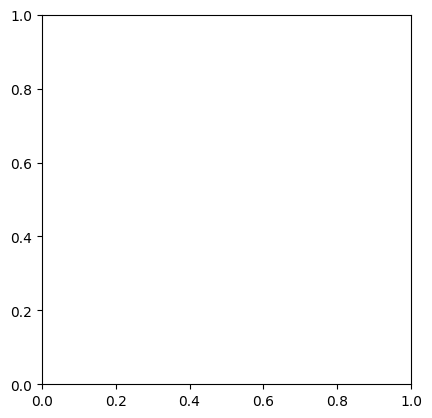

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
import numpy as np

In [ ]:
i = 0
train_imgs = []
for img_path in train_imgs_path:
    img = plt.imread(img_path)
    train_imgs.append(img)
    i += 1
    if i % 1000 == 0:
        print('{} / {}'.format(i, len(train_imgs_path)))
    elif i == 6334:
        print('6334 / 6334 (End)')

FileNotFoundError: ignored

In [ ]:
type(train_imgs)

list

In [ ]:
train_imgs = np.array(train_imgs)

In [ ]:
train_imgs.shape

(0,)

In [ ]:
train_imgs_path[0]

'/content/drive/MyDrive/JBNU/2023 AI 전공특화교육/project/slim-covid 19-detection/resized_archive/train000a312787f2.jpg'

In [ ]:
train_imgs[:,:,:,np.newaxis].shape

IndexError: ignored